In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import mahalanobis

In [2]:
pheno_his = pd.read_csv('/gpfs/commons/groups/knowles_lab/data/ADSP_reguloML/ADSP_vcf/phenotype_file/release_36K/pheno_1000k.tsv', sep = '\t')

/gpfs/commons/home/tlin/.conda/envs/polyfun/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
pheno_his

,SUBJID,SampleID,Sex,Diagnosis,APOE_reported,Age,Race,Ethnicity,FamID,source,...,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
0,ADNI_002_S_0685,ADNI_002_S_0685,1.0,0.0,33.0,90,5.0,0.0,NaN,ADNI,...,-0.1291,0.1888,1.2494,-1.9800,0.4404,-1.6879,0.3571,1.1045,-2.2589,-2.8125
1,ADNI_002_S_1155,ADNI_002_S_1155,0.0,0.0,33.0,69,5.0,0.0,NaN,ADNI,...,-1.9598,-0.2402,1.1720,1.3591,1.1451,-0.0500,-0.3733,1.1487,-0.0178,-2.1215
2,ADNI_002_S_1261,ADNI_002_S_1261,1.0,0.0,33.0,82,5.0,0.0,NaN,ADNI,...,0.5693,0.8296,-1.8191,0.4448,0.3960,-0.4971,0.0639,0.7521,-0.1974,-2.4702
3,ADNI_002_S_2010,ADNI_002_S_2010,1.0,0.0,34.0,68,6.0,0.0,NaN,ADNI,...,-0.4873,-0.8054,1.2155,-0.9010,1.2350,-0.5126,0.5264,2.6370,-1.3014,-2.9664
4,ADNI_002_S_2073,ADNI_002_S_2073,1.0,0.0,33.0,69,5.0,0.0,NaN,ADNI,...,2.6870,-1.1769,-0.5115,-0.0337,1.2445,-1.6332,-1.3144,1.0681,-0.9179,-2.7834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26329,A-CUHS-CU005861,A-CUHS-CU005861-BL-COL-49677BL1,1.0,0.0,33.0,58,6.0,1.0,CU0170F,Family_based,...,-0.8532,0.6294,2.9415,-0.6988,-0.9819,-0.5281,-0.2099,2.5507,-0.1355,-1.9739
26330,A-WRAP-WR000875,A-WRAP-WR000875-BL-NCR-104770975,1.0,0.0,33.0,61,5.0,0.0,WR1702F,Family_based,...,-0.7980,-0.1495,0.4935,1.0514,-1.1946,-0.4326,0.3378,1.5908,-0.4217,-2.4601
26331,A-CUHS-CU004425,A-CUHS-CU004425-BL-COL-40853BL1,0.0,0.0,33.0,63,6.0,1.0,CU0149F,Family_based,...,-0.6031,-0.9181,1.4087,1.1161,-0.6302,-0.8908,0.4940,1.4535,-1.2119,-2.9259
26332,A-WRAP-WR000196,A-WRAP-WR000196-BL-NCR-0005966657,1.0,0.0,34.0,64,5.0,0.0,WR1163F,Family_based,...,0.3034,0.7651,0.9229,1.6726,0.0112,1.0862,-1.1376,-0.6324,-0.1302,-1.8220


In [5]:
pheno_his.columns

Index(['SUBJID', 'SampleID', 'Sex', 'Diagnosis', 'APOE_reported', 'Age',
       'Race', 'Ethnicity', 'FamID', 'source', 'fin_population_temp',
       'predicted_ancestry', 'given_ancestry', 'EAS_prob', 'AFR_prob',
       'AMR_prob', 'SAS_prob', 'EUR_prob', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5',
       'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14',
       'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20'],
      dtype='object')

In [12]:
pheno_his

,SUBJID,SampleID,Sex,Diagnosis,APOE_reported,Age,Race,Ethnicity,FamID,source,...,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
0,ADNI_002_S_0685,ADNI_002_S_0685,1.0,0.0,33.0,90,5.0,0.0,NaN,ADNI,...,-0.1291,0.1888,1.2494,-1.9800,0.4404,-1.6879,0.3571,1.1045,-2.2589,-2.8125
1,ADNI_002_S_1155,ADNI_002_S_1155,0.0,0.0,33.0,69,5.0,0.0,NaN,ADNI,...,-1.9598,-0.2402,1.1720,1.3591,1.1451,-0.0500,-0.3733,1.1487,-0.0178,-2.1215
2,ADNI_002_S_1261,ADNI_002_S_1261,1.0,0.0,33.0,82,5.0,0.0,NaN,ADNI,...,0.5693,0.8296,-1.8191,0.4448,0.3960,-0.4971,0.0639,0.7521,-0.1974,-2.4702
3,ADNI_002_S_2010,ADNI_002_S_2010,1.0,0.0,34.0,68,6.0,0.0,NaN,ADNI,...,-0.4873,-0.8054,1.2155,-0.9010,1.2350,-0.5126,0.5264,2.6370,-1.3014,-2.9664
4,ADNI_002_S_2073,ADNI_002_S_2073,1.0,0.0,33.0,69,5.0,0.0,NaN,ADNI,...,2.6870,-1.1769,-0.5115,-0.0337,1.2445,-1.6332,-1.3144,1.0681,-0.9179,-2.7834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26329,A-CUHS-CU005861,A-CUHS-CU005861-BL-COL-49677BL1,1.0,0.0,33.0,58,6.0,1.0,CU0170F,Family_based,...,-0.8532,0.6294,2.9415,-0.6988,-0.9819,-0.5281,-0.2099,2.5507,-0.1355,-1.9739
26330,A-WRAP-WR000875,A-WRAP-WR000875-BL-NCR-104770975,1.0,0.0,33.0,61,5.0,0.0,WR1702F,Family_based,...,-0.7980,-0.1495,0.4935,1.0514,-1.1946,-0.4326,0.3378,1.5908,-0.4217,-2.4601
26331,A-CUHS-CU004425,A-CUHS-CU004425-BL-COL-40853BL1,0.0,0.0,33.0,63,6.0,1.0,CU0149F,Family_based,...,-0.6031,-0.9181,1.4087,1.1161,-0.6302,-0.8908,0.4940,1.4535,-1.2119,-2.9259
26332,A-WRAP-WR000196,A-WRAP-WR000196-BL-NCR-0005966657,1.0,0.0,34.0,64,5.0,0.0,WR1163F,Family_based,...,0.3034,0.7651,0.9229,1.6726,0.0112,1.0862,-1.1376,-0.6324,-0.1302,-1.8220


In [4]:
pheno_his.iloc[:2,17:39]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
0,-2.5139,11.6395,5.0501,-6.2193,-1.7264,1.3579,2.4123,-0.4784,-1.1008,-1.2562,-0.1291,0.1888,1.2494,-1.9800,0.4404,-1.6879,0.3571,1.1045,-2.2589,-2.8125
1,0.8831,10.5950,3.9492,-6.3287,0.6351,-0.7608,-1.4429,0.1283,-1.1084,0.4911,-1.9598,-0.2402,1.1720,1.3591,1.1451,-0.0500,-0.3733,1.1487,-0.0178,-2.1215


## Mahalanobis distance check (If scaling matters)

In [101]:
pc = np.array(pheno_his.iloc[1,17:37])
mean_vector = np.mean(pheno_his.iloc[1:30,17:37], axis=0)
cov_matrix = np.cov(pheno_his.iloc[1:30,17:37], rowvar=False)

In [70]:
_sb_q = np.array(pheno_his.iloc[:200, 17:39])

In [86]:
#_sb_q_norm = _sb_q / np.std(_sb_q, axis = 0, keepdims = True)  ## check std
_sb_q_norm = _sb_q / np.linalg.eigvals(_sb_q.T @ _sb_q)  ## check eigval
_sb_S_norm = np.cov(_sb_q_norm.T)
_sb_qmean_norm = np.mean(_sb_q_norm, axis = 0)
_sb_pc_norm = _sb_q_norm[1, :]
mahalanobis(_sb_pc_norm, _sb_qmean_norm, np.linalg.inv(_sb_S_norm))

4.617803081373374

In [87]:
## without scaling

_sb_S = np.cov(_sb_q.T)
_sb_qmean = np.mean(_sb_q, axis = 0)
_sb_pc = _sb_q[1, :]
mahalanobis(_sb_pc, _sb_qmean, np.linalg.inv(_sb_S))

4.617803081373375

In [ ]:
_sbb_S = np.cov(_sbb_q.T)
_sbb_qmean = np.mean(_sbb_q, axis = 0)
_sbb_pc = _sbb_q[1, :]
mahalanobis(_sbb_pc, _sbb_qmean, np.linalg.inv(_sbb_S))

In [66]:

mahalanobis(pc, mean_vector, np.linalg.inv(cov_matrix))

4.273641665208202

## mahalanobis

In [95]:
pheno_his.columns

Index(['SUBJID', 'SampleID', 'Sex', 'Diagnosis', 'APOE_reported', 'Age',
       'Race', 'Ethnicity', 'FamID', 'source', 'predicted_ancestry',
       'given_ancestry', 'EAS_prob', 'AFR_prob', 'AMR_prob', 'SAS_prob',
       'EUR_prob', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8',
       'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17',
       'PC18', 'PC19', 'PC20'],
      dtype='object')

In [3]:
EUR = pheno_his.loc[pheno_his.predicted_ancestry == 'EUR']
mean_vector = np.mean(EUR.iloc[:,17:37], axis=0)
cov_matrix = np.cov(EUR.iloc[:,17:37], rowvar=False)

In [128]:
mahalanobis(pheno_his.iloc[:1,17:37], mean_vector, np.linalg.inv(cov_matrix))

4.920628774155655

In [5]:
pheno_his['mahalanobis'] = "NAN"

In [130]:
pheno_his.iloc[1,17:37]

PC1     0.8831
PC2     10.595
PC3     3.9492
PC4    -6.3287
PC5     0.6351
PC6    -0.7608
PC7    -1.4429
PC8     0.1283
PC9    -1.1084
PC10    0.4911
PC11   -1.9598
PC12   -0.2402
PC13     1.172
PC14    1.3591
PC15    1.1451
PC16     -0.05
PC17   -0.3733
PC18    1.1487
PC19   -0.0178
PC20   -2.1215
Name: 1, dtype: object

In [6]:
for i in range(pheno_his.shape[0]):
    distance = mahalanobis(pheno_his.iloc[i,17:37], mean_vector, np.linalg.inv(cov_matrix))
    pheno_his['mahalanobis'][i] = distance

/gpfs/commons/home/tlin/.conda/envs/polyfun/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [35]:
EUR.shape

(11089, 37)

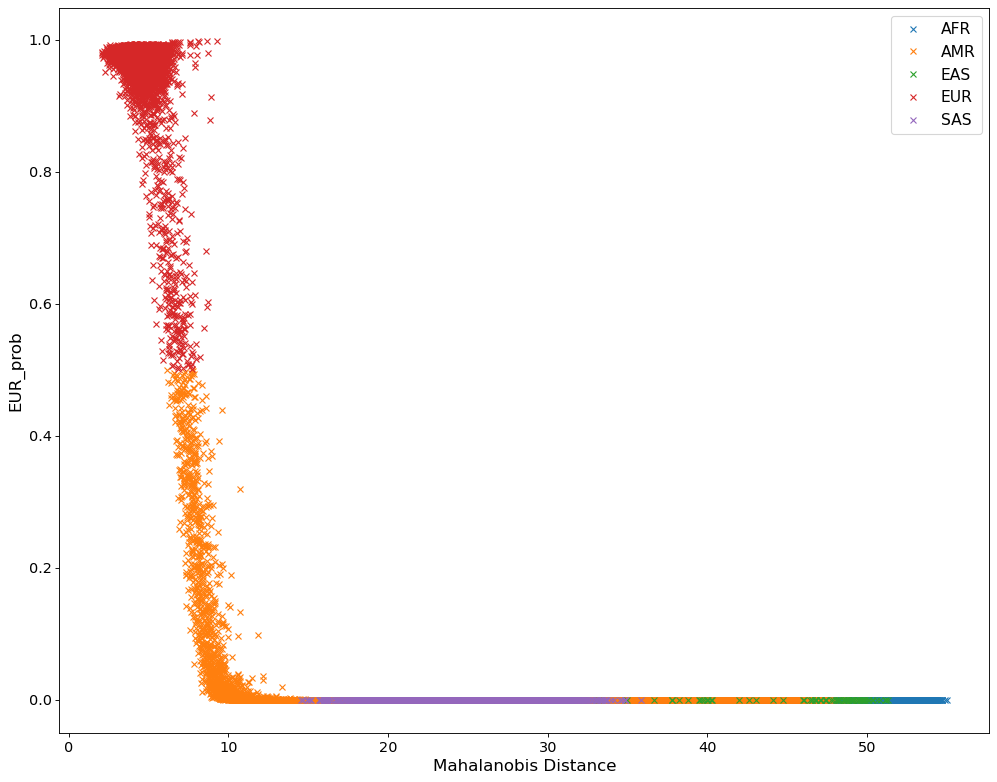

In [30]:
classes = pd.Categorical(pheno_his.predicted_ancestry).codes
# pheno_his.plot.scatter(x = 'mahalanobis',y = 'EUR_prob', c=classes)
# scatter = plt.scatter(pheno_his.mahalanobis, pheno_his.EUR_prob, c=classes)
# #plt.legend(handles=scatter.legend_elements()[0], labels = pheno_his.predicted_ancestry,  
# #plt.show()

#from matplotlib.pyplot import figure
groups = pheno_his.groupby('predicted_ancestry')
figure(figsize=(15, 12), dpi=80)
for name, group in groups:
    plt.plot(group.mahalanobis, group.EUR_prob, marker='x', linestyle='', markersize=5, label=name)
plt.legend(fontsize=14)

plt.rcParams.update({'font.size': 13})
plt.xlabel("Mahalanobis Distance", fontsize=15)
plt.ylabel("EUR_prob",fontsize=15)
plt.show()

In [34]:
pheno_his.to_csv('/gpfs/commons/groups/knowles_lab/data/ADSP_reguloML/ADSP_vcf/phenotype_file/release_36K/pheno_1000k.tsv', index = False, sep = '\t')

In [ ]:


# PC values for the observation X (20 PCs)
pc_values = np.array([pc1_value, pc2_value, ..., pc20_value])  # Replace with the actual PC values

# Mean vector (μ) for the 20 PCs
mean_vector = np.array([mean_pc1, mean_pc2, ..., mean_pc20])  # Replace with the actual mean values

# Covariance matrix (Σ) for the 20 PCs
covariance_matrix = np.array([[cov_pc1_pc1, cov_pc1_pc2, ..., cov_pc1_pc20],
                             [cov_pc2_pc1, cov_pc2_pc2, ..., cov_pc2_pc20],
                             ...,
                             [cov_pc20_pc1, cov_pc20_pc2, ..., cov_pc20_pc20]])  # Replace with the actual covariance values

# Step 1: Compute the inverse of the covariance matrix
inv_cov_matrix = np.linalg.inv(covariance_matrix)

# Step 2: Calculate the Mahalanobis distance
mahalanobis_distance = mahalanobis(pc_values, mean_vector, inv_cov_matrix)

print("Mahalanobis distance:", mahalanobis_distance)
